In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from collections import Counter
import copy

In [2]:
def plotImage(image):
    plt.imshow(image,cmap='gray',vmin=0,vmax=255)
    plt.show()

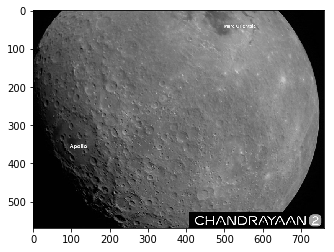

(569, 760)

In [3]:
img = cv2.imread('Chandrayaan2 - Q3a-inputimage.png',0)
original_img=copy.deepcopy(img)

plotImage(img)

img.shape

### padding

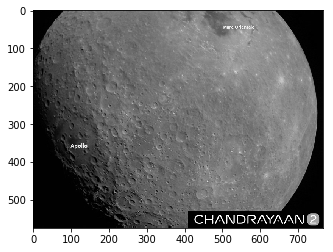

In [4]:
temp=img[:,0]
for i in range(3):
    img=np.insert(img, 0, temp, axis=1)

temp=img[:,762]
for i in range(3):
    img=np.insert(img, -1, temp, axis=1)

temp=img[:1,:]
for i in range(3):
    img=np.insert(img, 0, temp, axis=0)

temp=img[-1:,:]
for i in range(3):
    img=np.insert(img, -1, temp, axis=0)

img.shape

plotImage(img)

### Convolution with filter

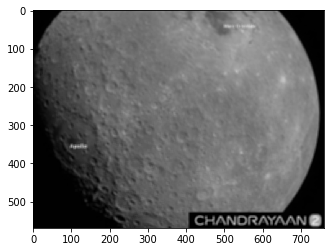

In [5]:
ones_filter=np.ones((7,7),dtype=int)

convoluted_img=[]
for i in range(3,img.shape[0]-3):
    for j in range(3,img.shape[1]-3):
        subMat=img[i-3:i+4,j-3:j+4]
        convValue=(np.sum(subMat*ones_filter))/49
        convoluted_img.append(convValue)
convoluted_img=np.asarray(convoluted_img).reshape(569,760)

plotImage(convoluted_img)

### mask_img

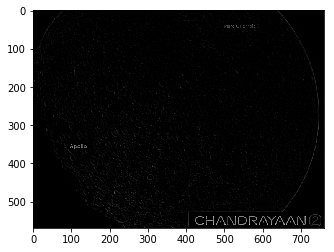

In [6]:
mask_img=original_img-convoluted_img

plotImage(mask_img)

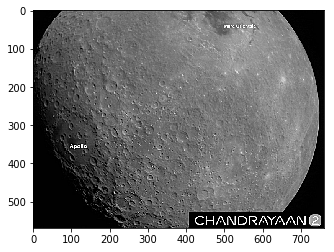

In [7]:
unsharp_img = original_img + mask_img
plotImage(unsharp_img)

In [8]:
cv2.imwrite('output.jpg',unsharp_img)

True